In [1]:
import numpy as np 
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

Channel :
 [2 1]
1    298
2    142
Name: Channel, dtype: int64

 **************************************** 

Region :
 [3 1 2]
3    316
1     77
2     47
Name: Region, dtype: int64

 **************************************** 

Fresh :
 [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

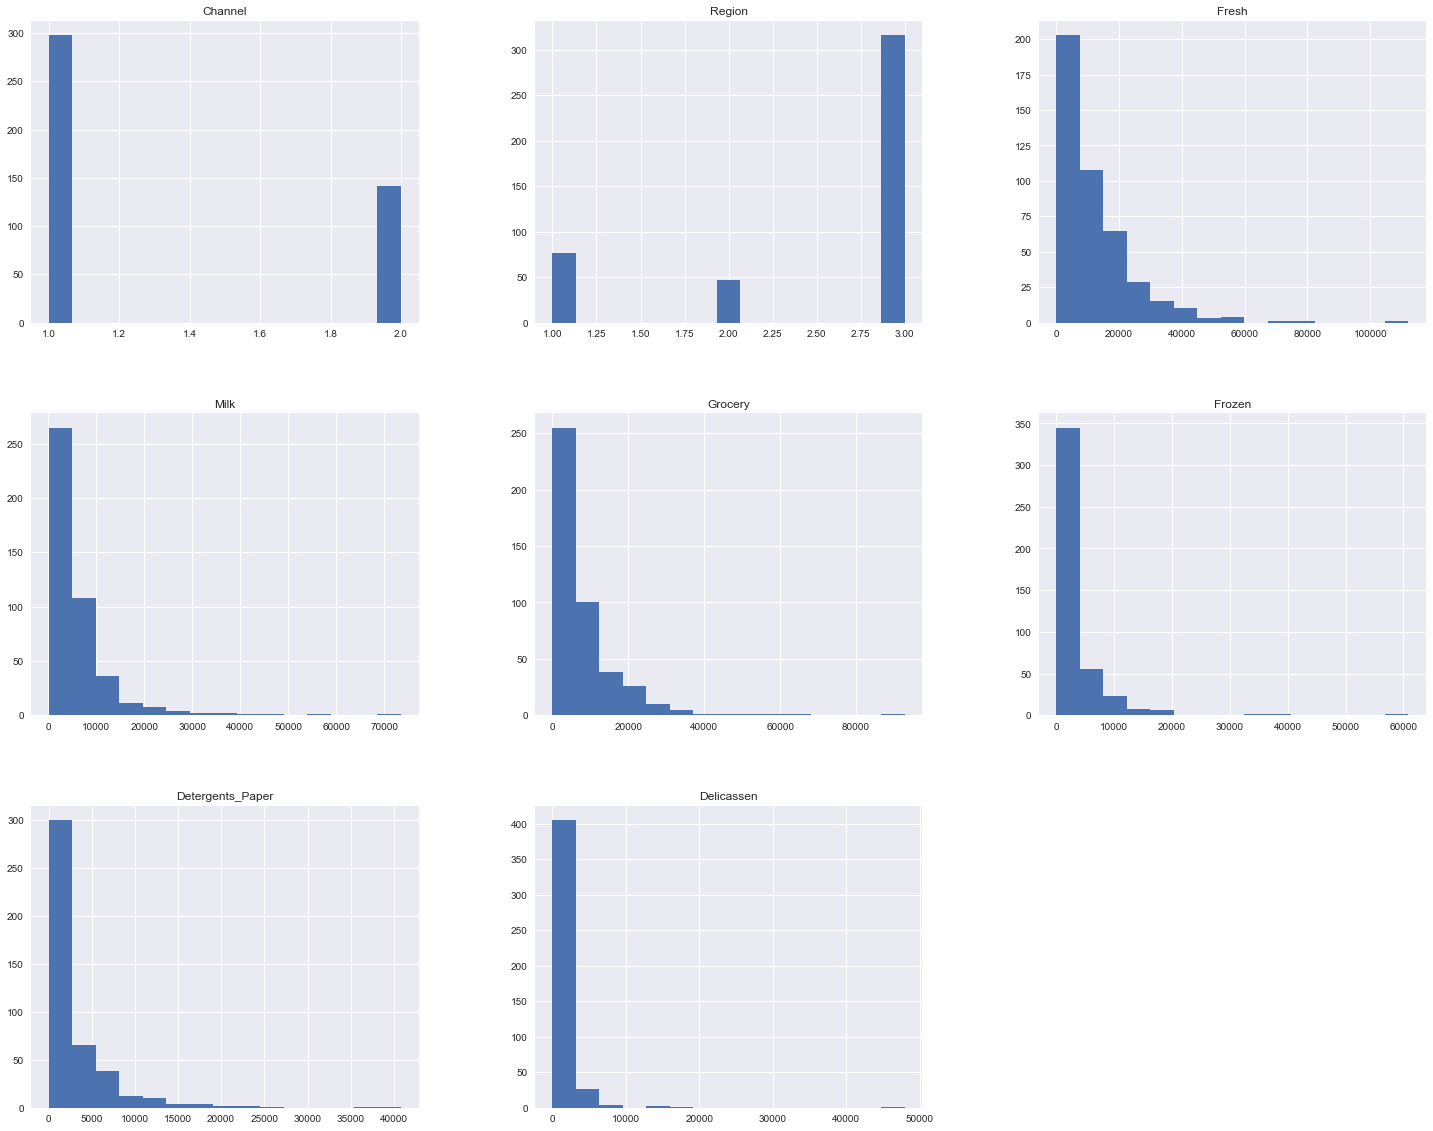

In [6]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [8]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

<AxesSubplot:xlabel='Channel', ylabel='count'>

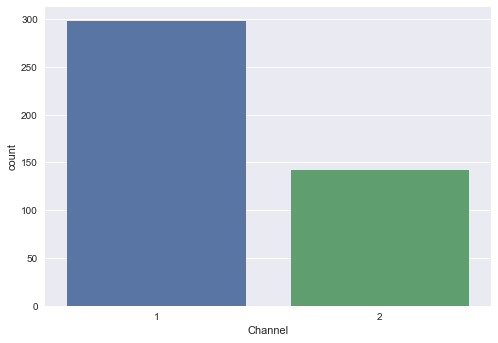

In [9]:
sns.countplot(x="Channel", data=df)

<AxesSubplot:ylabel='Channel'>

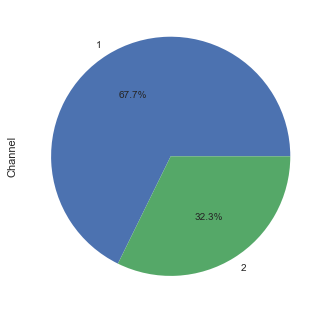

In [10]:
df['Channel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
df.shape

(440, 8)

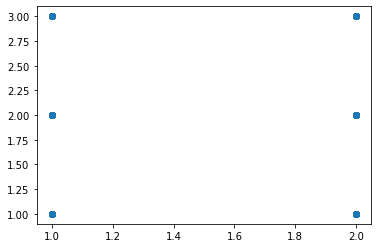

In [9]:
plt.scatter(df['Channel'],df['Region'])

### Using Elbow Method

In [64]:
sum_of_sqr_distance = []
k_range = range(1,15)
for k in k_range:
    km_model2 = KMeans(n_clusters=k)
    km_model2.fit(df)
    sum_of_sqr_distance.append(km_model2.inertia_)

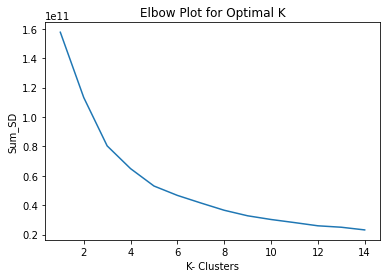

In [65]:
# Plot for Elbow Method
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('K- Clusters')
plt.ylabel('Sum_SD')
plt.title("Elbow Plot for Optimal K")
plt.show()

### Using Silhouette Method for finding Optimal K

In [12]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km_models3 = KMeans(n_clusters=n_clusters)
    preds = km_models3.fit_predict(df)
    centers = km_models3.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5115333882980367)
For n_clusters = 3, silhouette score is 0.4783511411368133)
For n_clusters = 4, silhouette score is 0.41435163220688853)
For n_clusters = 5, silhouette score is 0.3878346672087667)
For n_clusters = 6, silhouette score is 0.37825536196370885)


In [14]:
km3 = KMeans(n_clusters=2)

In [15]:
# Fit Predict
y_pred = km3.fit_predict(df)

In [16]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
# Centroid or Cluster Centers
km3.cluster_centers_

array([[1.34133333e+00, 2.52800000e+00, 7.94411200e+03, 5.15181867e+03,
        7.53612800e+03, 2.48413067e+03, 2.87255733e+03, 1.21426133e+03],
       [1.21538462e+00, 2.63076923e+00, 3.54013692e+04, 9.51423077e+03,
        1.03463692e+04, 6.46309231e+03, 2.93304615e+03, 3.31684615e+03]])

In [18]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
df['clusters'] = y_pred

In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


### Plotting the Clusters

In [21]:
df['clusters'].unique()

array([0, 1])

In [22]:
df0 = df[df['clusters'] == 0]
df01 = df[df['clusters'] == 1]

Text(0, 0.5, 'Cluster')

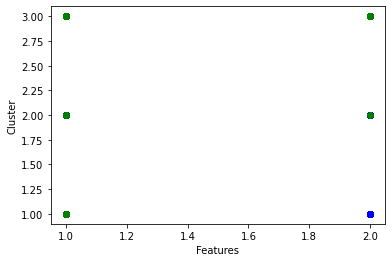

In [23]:
# Scatter Plot  of Clusters
plt.scatter(df0['Channel'],df0['Region'],color='blue')
plt.scatter(df01['Channel'],df01['Region'],color='green')
plt.xlabel('Features')
plt.ylabel('Cluster')

In [24]:
km3.cluster_centers_

array([[1.34133333e+00, 2.52800000e+00, 7.94411200e+03, 5.15181867e+03,
        7.53612800e+03, 2.48413067e+03, 2.87255733e+03, 1.21426133e+03],
       [1.21538462e+00, 2.63076923e+00, 3.54013692e+04, 9.51423077e+03,
        1.03463692e+04, 6.46309231e+03, 2.93304615e+03, 3.31684615e+03]])

### Scatter Plot with Centroids

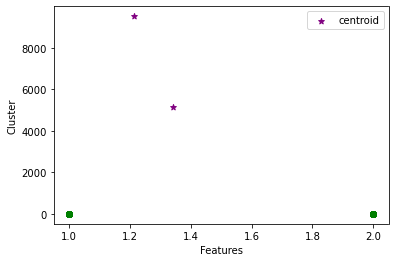

In [25]:
plt.scatter(df0['Channel'],df0['Region'],color='black')
plt.scatter(df01['Channel'],df01['Region'],color='green')
plt.scatter(km3.cluster_centers_
           [:,0],km3.
            cluster_centers_[:,3],
           color='purple',marker='*',
           label='centroid')

plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()

### Using Silhouette Plot

In [62]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
    if ax is None:
        ax = plt.gca()
        # Compute the silhouette scores for each sample
        silhouette_avg = silhouette_score(X, y)
        sample_silhouette_values = silhouette_samples(X, y)
        y_lower = padding = 2
        for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
            ith_cluster_silhouette_values = sample_silhouette_values[y == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                            0,ith_cluster_silhouette_values,
                            facecolor=color,
                            edgecolor=color,
                            alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
            # Compute the new y_lower for next plot
            y_lower = y_upper + padding
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        # The vertical line for average silhoutte score of all the values
        ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
        ax.annotate('Average',
                    xytext=(silhouette_avg, y_lower * 1.025),
                    xy=(0, 0),
                    ha='center',
                    alpha=0.8,
                    c='r')
        ax.set_yticks([]) # Clear the yaxis labels / ticks
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_ylim(0, y_upper + 1)
        ax.set_xlim(-0.075, 1.0)
        return ax

<AxesSubplot:xlabel='The silhouette coefficient values', ylabel='Cluster label'>

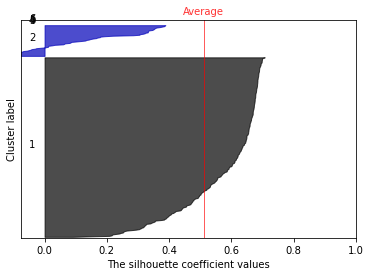

In [63]:
### Silhoutte Plot
silhouette_plot(df,y_pred,6,ax=None)

<AxesSubplot:xlabel='The silhouette coefficient values', ylabel='Cluster label'>

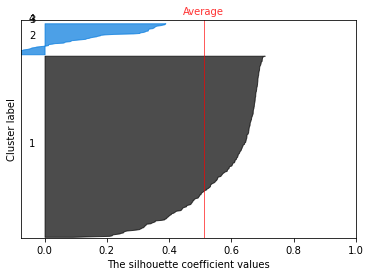

In [28]:
### Silhoutte Plot
silhouette_plot(df,y_pred,4,ax=None)

<AxesSubplot:xlabel='The silhouette coefficient values', ylabel='Cluster label'>

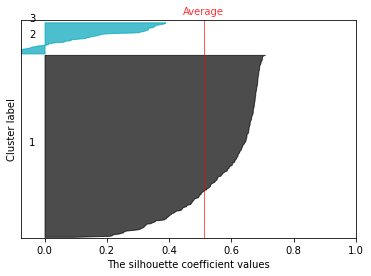

In [29]:
### Silhoutte Plot
silhouette_plot(df,y_pred,3,ax=None)

<AxesSubplot:xlabel='The silhouette coefficient values', ylabel='Cluster label'>

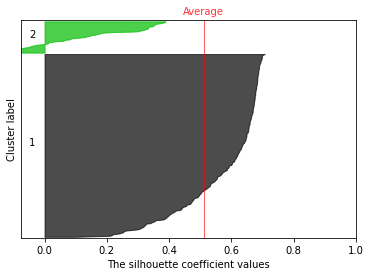

In [30]:
### Silhoutte Plot
silhouette_plot(df,y_pred,2,ax=None)

### Density-Based Spatial Clustering

In [31]:
df = pd.read_csv("Wholesale customers data.csv")

In [32]:
df.shape

(440, 8)

In [33]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [34]:
# Scale our data
from sklearn.preprocessing import StandardScaler

In [35]:
X = StandardScaler().fit_transform(df)

In [36]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [37]:
# Init Model
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=0.3,min_samples=10)

In [39]:
# Fit Model
y_cluster_dbs = dbscan.fit_predict(X)

In [40]:
y_cluster_dbs

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [41]:
#  Number of Unique Clusters
set(y_cluster_dbs)

{-1, 0}

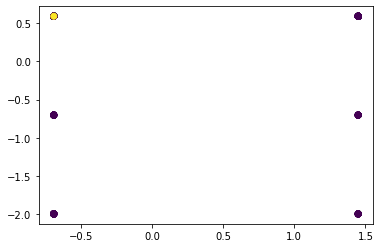

In [42]:
# Non Spherical Data
plt.scatter(X[:,0],X[:,1],c=y_cluster_dbs)

In [43]:
# Number of cluster
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [44]:
n_clusters_

1

In [45]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)

In [46]:
n_noise

394

### Clustering using Hierarchical Clustering

In [47]:
# Load Dataset
df = pd.read_csv("Wholesale customers data.csv")

In [48]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [49]:
# Normalization
from sklearn.preprocessing import normalize

In [50]:
# Scale/Normal
df_scaled = normalize(df)

In [51]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [52]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [53]:
# Detecting Number of Clusters sing Dendogram
import scipy.cluster.hierarchy as shc

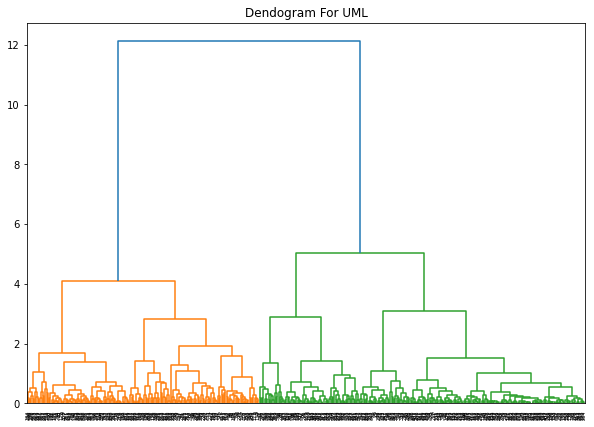

In [54]:
plt.figure(figsize=(10,7))
plt.title("Dendogram For UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))

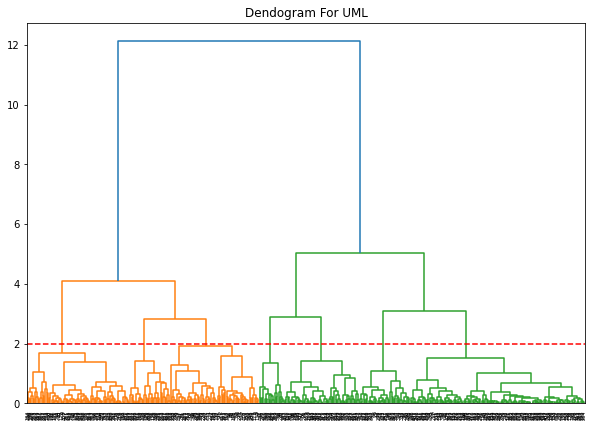

In [55]:
plt.figure(figsize=(10,7))
plt.title("Dendogram For UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))
plt.axhline(y=2,color='r',linestyle='--')

In [56]:
# model building
from sklearn.cluster import AgglomerativeClustering

In [57]:
hcluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [58]:
y_clust_hcl = hcluster.fit_predict(df_scaled)

In [59]:
y_clust_hcl

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [60]:
 df_scaled['clusters'] = y_clust_hcl

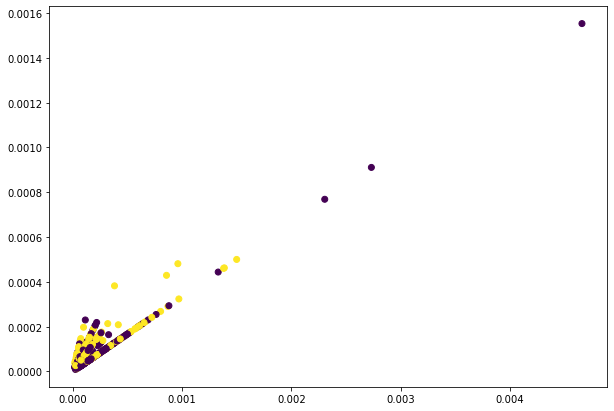

In [61]:
# Plot
plt.figure(figsize=(10,7))
plt.scatter(df_scaled['Region'],df_scaled['Channel'],c=df_scaled['clusters'])